In [3]:
# 读取 MNIST 数据集
from tensorflow.examples.tutorials.mnist import input_data
# one_hot=False表示因变量将用一个标量表示，而非one_hot编码形式
data = input_data.read_data_sets("data/MNIST/", one_hot=False) 

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [5]:
# 准备训练数据与测试数据
X0 = data.train.images
Y0 = data.train.labels
X1 = data.validation.images
Y1 = data.validation.labels
print(X0.shape) # 将原始的像素矩阵直接拉直

(55000, 784)


<Figure size 432x288 with 0 Axes>

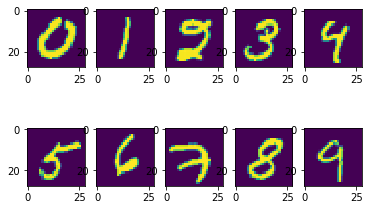

In [9]:
# 手写数字展示
from matplotlib import pyplot as plt
plt.figure()
fig, ax = plt.subplots(2, 5)
ax = ax.flatten()
for i in range(10):
    Im = X0[Y0==i][0].reshape(28, 28)
    ax[i].imshow(Im)
plt.show()

In [10]:
# 使用函数 to_categorical将因变量Y0处理成one-hot编码形式
from keras.utils import to_categorical
YY0 = to_categorical(Y0)
YY1 = to_categorical(Y1)
YY1

Using TensorFlow backend.


array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [13]:
# 逻辑回归的构建
from keras.layers import Activation, Dense, Flatten, Input
from keras import Model

input_shape = (784, )
input_layer = Input(input_shape) # 输入层
x = input_layer
x = Dense(10)(x) # 10 代表 10 分类
x = Activation('softmax')(x)
output_layer = x
model = Model(input_layer, output_layer)

# 查看模型
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [16]:
# 模型编译
from keras.optimizers import Adam
model.compile(optimizer = Adam(0.01),
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [17]:
# 模型拟合
model.fit(X0, YY0,
         validation_data = (X1, YY1),
         batch_size = 1000,
         epochs = 10)

Epoch 1/10
55/55 [==============================] - 0s 7ms/step - loss: 0.5751 - accuracy: 0.8356 - val_loss: 0.3220 - val_accuracy: 0.9100
Epoch 2/10
55/55 [==============================] - 0s 4ms/step - loss: 0.3220 - accuracy: 0.9089 - val_loss: 0.2878 - val_accuracy: 0.9190
Epoch 3/10
55/55 [==============================] - 0s 4ms/step - loss: 0.2940 - accuracy: 0.9187 - val_loss: 0.2814 - val_accuracy: 0.9230
Epoch 4/10
55/55 [==============================] - 0s 4ms/step - loss: 0.2828 - accuracy: 0.9211 - val_loss: 0.2714 - val_accuracy: 0.9246
Epoch 5/10
55/55 [==============================] - 0s 4ms/step - loss: 0.2721 - accuracy: 0.9237 - val_loss: 0.2671 - val_accuracy: 0.9260
Epoch 6/10
55/55 [==============================] - 0s 4ms/step - loss: 0.2662 - accuracy: 0.9256 - val_loss: 0.2635 - val_accuracy: 0.9294
Epoch 7/10
55/55 [==============================] - 0s 4ms/step - loss: 0.2617 - accuracy: 0.9262 - val_loss: 0.2584 - val_accuracy: 0.9292
Epoch 8/10
55/55 [==

In [18]:
# 参数估计结果可视化
# 1. 查看模型各层
model.layers

In [19]:
# 通过model.layers[1].get_weights()获得Dense层的参数估计结果
model.layers[1].get_weights()

[array([[ 0.01859212, -0.04520582, -0.06109782, ...,  0.03038763,
         -0.04744271, -0.04567963],
        [ 0.04505137,  0.07738698, -0.07712557, ...,  0.07970465,
         -0.01804768,  0.06172893],
        [-0.00702079, -0.0440008 ,  0.01437684, ...,  0.0735951 ,
          0.05370807,  0.05389868],
        ...,
        [ 0.04756872,  0.07942914, -0.06200272, ...,  0.03674687,
          0.07647615, -0.04642488],
        [ 0.02468078,  0.08613317,  0.02755796, ...,  0.05764206,
          0.0079499 , -0.01912425],
        [ 0.08045087, -0.01119263, -0.08387438, ...,  0.0828877 ,
         -0.04624857, -0.00491106]], dtype=float32),
 array([-0.29977894,  0.59931046,  0.03922305, -0.47246403,  0.14324649,
         1.2657558 , -0.20916145,  0.7069487 , -1.3635131 , -0.369649  ],
       dtype=float32)]

In [20]:
# 2.利用.shape()查看第1个array的维度
model.layers[1].get_weights()[0].shape

(784, 10)

<Figure size 432x288 with 0 Axes>

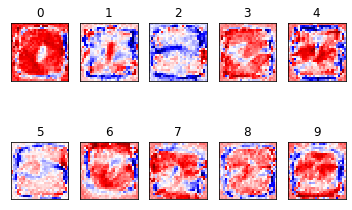

In [21]:
# 3.参数可视化
plt.figure()
fig, ax = plt.subplots(2, 5)
ax = ax.flatten()
weights = model.layers[1].get_weights()[0]
for i in range(10):
    Im = weights[:, i].reshape(28, 28)
    ax[i].imshow(Im, cmap="seismic")
    ax[i].set_title("{}".format(i))
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.show()